<h1>Sobre el conjunto de datos model.txt</h1>

<h2>Leer los datos</h2>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo
df = pd.read_csv("model.txt", sep='\s+', header=None, skiprows=2,
                 names=['YYYYMMDD', 'HHMM', 'M(m/s)', 'D(deg)', 'T(C)', 'De(k/m3)', 'PRE(hPa)', 'RiNumber', 'RH(%)'])

# Mostrar las primeras 10 filas
df.head(10)

C:\Users\Irisbel\AppData\Local\Temp\ipykernel_3088\2828338323.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("model.txt", sep='\s+', header=None, skiprows=2,


,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
0,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
1,19840101,0000,20.8,243,7.3,1.25,1002.8,0.04,86.3
2,19840101,0100,20.8,243,7.3,1.25,1002.2,0.04,86.9
3,19840101,0200,20.6,243,7.4,1.24,1001.8,0.04,87.0
4,19840101,0300,20.4,244,7.5,1.24,1001.5,0.05,86.2
5,19840101,0400,20.3,245,7.5,1.24,1001.2,0.05,85.6
6,19840101,0500,20.4,245,7.6,1.24,1000.9,0.06,85.2
7,19840101,0600,20.8,246,7.7,1.24,1000.5,0.07,84.7
8,19840101,0700,20.8,246,7.8,1.24,1000.3,0.08,84.1
9,19840101,0800,20.5,244,7.9,1.24,1000.3,0.09,83.9


<h2>Gráfica con los históricos de cada año, agrupados por meses, superpuestos.</h2>

month         1          2          3          4          5          6   \
year                                                                      
1984   13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985   10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986   13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987    8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988   12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989    9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990   13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991   11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992    9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993   13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994   12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995   14.024866  13.2391

<Figure size 1500x500 with 0 Axes>

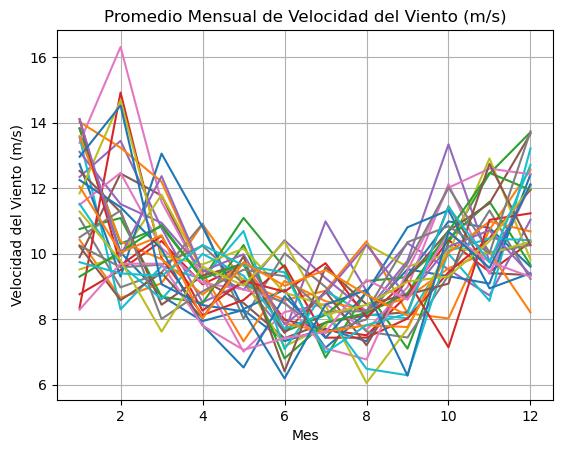

In [57]:
# Importando librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt


model = pd.read_csv("C:/Users/Irisbel/Desktop/Cuarta_evaluacion/Calculo_numerico/Evaluacion_4/model.txt", 
                     delim_whitespace=True, 
                     skiprows=3, 
                     parse_dates={'Timestamp': [0, 1]}, 
                     index_col='Timestamp')


model['month'] = model.index.month
model['year'] = model.index.year


monthly_means = model.groupby(['year', 'month'])['M(m/s)'].mean().reset_index()


monthly_pivot = monthly_means.pivot_table(index='year', columns='month', values='M(m/s)')


print(monthly_pivot)


plt.figure(figsize=(15, 5))
monthly_pivot.T.plot(legend=False)
plt.title('Promedio Mensual de Velocidad del Viento (m/s)')
plt.xlabel('Mes')
plt.ylabel('Velocidad del Viento (m/s)')
plt.grid(True)
plt.show()